# DATA SCIENCE JOBS: SALARIES AND TYPE OF WORKS MODELS

## Project information

In recent years, data science roles are more demanded, so it's important to understand how they are evolving in terms of positioning as job offers and their salaries.

In this analysis, I will take my first Exploratory Data Analysis (EDA) and visualization project using Python, where I explored data science salaries between 2020 and 2023. 

The "global salary index" dataset comes from the ai-jobs.net website for roles in the AI, ML, Data Science space based on internal data obtanided from surveys and jobs with open salaries.

This dataset is processed and updated on a weekly basis but I'll take the dataset updated on September 29th, 2023.

## Hypothesis

## Understanding and preprocessing the dataset

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%matplotlib inline

### Read dataset

In [2]:
df = pd.read_csv('/Users/marina/Documents/Marina/Bootcamp/Week_5/Mid_bootcamp_project/data/raw/salaries.csv')
df.head(500)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Scientist,130000,CAD,96313,CA,100,CA,S
1,2023,SE,FT,Machine Learning Engineer,250000,USD,250000,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,140000,USD,140000,US,0,US,M
3,2023,MI,FT,Data Analyst,45000,EUR,48585,PT,100,PT,M
4,2023,MI,FT,Data Analyst,40000,EUR,43187,PT,100,PT,M
...,...,...,...,...,...,...,...,...,...,...,...
495,2023,MI,FT,Data Manager,80000,USD,80000,US,0,US,M
496,2023,MI,FT,Data Manager,70000,USD,70000,US,0,US,M
497,2023,SE,FT,Data Scientist,260000,USD,260000,US,0,US,M
498,2023,SE,FT,Data Scientist,160000,USD,160000,US,0,US,M


### Dataset shape and information

In [3]:
print("Number of rows and columns in the dataset:",df.shape)

Number of rows and columns in the dataset: (7595, 11)


In [4]:
# Information about the dataset including the index dtype and columns, non-null values and memory usage
      
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595 entries, 0 to 7594
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           7595 non-null   int64 
 1   experience_level    7595 non-null   object
 2   employment_type     7595 non-null   object
 3   job_title           7595 non-null   object
 4   salary              7595 non-null   int64 
 5   salary_currency     7595 non-null   object
 6   salary_in_usd       7595 non-null   int64 
 7   employee_residence  7595 non-null   object
 8   remote_ratio        7595 non-null   int64 
 9   company_location    7595 non-null   object
 10  company_size        7595 non-null   object
dtypes: int64(4), object(7)
memory usage: 652.8+ KB


In [5]:
# Generate descriptive statistics
      
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,7595.000000,7.595000e+03,7595.000000,7595.000000
mean,2022.695721,1.775745e+05,148861.816853,40.283081
std,0.573055,4.872338e+05,64152.942337,48.323066
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2022.000000,1.052000e+05,105000.000000,0.000000
50%,2023.000000,1.440000e+05,142200.000000,0.000000
75%,2023.000000,1.897500e+05,185900.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
# Exploring column names of the dataframe

print("The column names of the dataset are::\n\n",df.columns)

The column names of the dataset are::

 Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


### Missing values

In [7]:
# Exploring if the dataset contains missing values

df.isnull().sum()/len(df)

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

In [8]:
print("Number of missing data in the dataset:",df.isnull().sum().sum())

Number of missing data in the dataset: 0


There is no missing data so it will not be necessary to delete any columns

### Unique values per column

In [9]:
# Exploring unique values per each column of the dataset

print("Number of unique values in columns:\n\n", df.nunique())

Number of unique values in columns:

 work_year                4
experience_level         4
employment_type          4
job_title              118
salary                1294
salary_currency         22
salary_in_usd         1566
employee_residence      85
remote_ratio             3
company_location        73
company_size             3
dtype: int64


With this exploration we can highlight some columns with many unique values, it will be important to analyze if we can work with these data or we will have to group them to reduce the size of the dataset.

- Job_title
- Salary
- Salary_in_usd
- Employee_residence
- Company location

### Overview data

________

## Data cleaning or transform it

Once we get all the overall information we can start working with the data and think about what changes we can make to clean up the data or transform it to ensure more meaningful consistency of certain values.

In [10]:
# We need to create a copy of the original dataframe before doing any transformation on the original data
# We will call the new df "data_cleaning" to recognize the process we are working with

data_cleaning0 = df.copy()
data_cleaning0.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Scientist,130000,CAD,96313,CA,100,CA,S
1,2023,SE,FT,Machine Learning Engineer,250000,USD,250000,US,0,US,M


We will have to divide the dataset into numerical and categorical columns.

In [11]:
# Before starting cleaning the numerical data we will need to transform the column "remote_ratio" into an object column

data_cleaning = data_cleaning0.copy()
data_cleaning['remote_ratio'] = data_cleaning['remote_ratio'].apply(str)

data_cleaning.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

## Cleaning numerical data

In [12]:
# Create new DataFrame with numericals columns

numericals = data_cleaning.select_dtypes(np.number)
numericals.head()

,work_year,salary,salary_in_usd
0,2023,130000,96313
1,2023,250000,250000
2,2023,140000,140000
3,2023,45000,48585
4,2023,40000,43187


In [13]:
# Check values dtypes

numericals.dtypes

work_year        int64
salary           int64
salary_in_usd    int64
dtype: object

In [14]:
# Count number of distinct elements in the numericals DataFrame 

numericals.nunique()

work_year           4
salary           1294
salary_in_usd    1566
dtype: int64

### "Work_year"

In [15]:
# Check the unique values
numericals["work_year"].value_counts()

work_year
2023    5652
2022    1650
2021     218
2020      75
Name: count, dtype: int64

### "Salary"

What we can take from this analysis is that there are two columns that have a number of values well above the rest. In this case the data is duplicated because we have the same salary/job title in different currencies.

To avoid duplications we will analize the salaries only in USD currency.

For that, we will remove the "salary" column and change the name of the "salary_in_usd" column to "salary".

- "salary"
- "salary_in_usd"


In [16]:
Drop "salary" column

SyntaxError: invalid syntax (3265449031.py, line 1)

In [ ]:
I.e

df.drop(labels=["colname"], axis=1, inplace=True)
df.rename(columns={"colname": "new_name"}, inplace=True)
df.head()

---

df.drop(labels=["salary"], axis=1, inplace=True)
df.rename(columns={"salary_in_usd": "salary"}, inplace=True)

df.head()

## Cleaning categorical data

In [17]:
Now, we will proceed to pre-processing the categorical data (clean and transformed).

Transform categorical data (encoded) https://www.datacamp.com/tutorial/categorical-data

Confirm if it's necessary or not

SyntaxError: unterminated string literal (detected at line 5) (1125698985.py, line 5)

In [18]:
# Create new DataFrame with categoricals columns

categoricals = data_cleaning.select_dtypes([object])
categoricals.head()

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,MI,FT,Data Scientist,CAD,CA,100,CA,S
1,SE,FT,Machine Learning Engineer,USD,US,0,US,M
2,SE,FT,Machine Learning Engineer,USD,US,0,US,M
3,MI,FT,Data Analyst,EUR,PT,100,PT,M
4,MI,FT,Data Analyst,EUR,PT,100,PT,M


Looking at the values included in each column we can see that some of them may be confusing, the current values  don't help us to understand the real meaning.

The columns affected are:

- "experience_level"
- "employment_type"
- "employee_residence"
- "remote_ratio"
- "company_location"
- "company_size"

We will need to evaluate individually to define if we need to replace or group them.

### "Experience_level"

In [19]:
# Check the unique values
categoricals["experience_level"].value_counts()

experience_level
SE    5468
MI    1479
EN     417
EX     231
Name: count, dtype: int64

In [20]:
"""We know that the real meanings per each value are:
    SE - Senior
    MI - Mid
    EN - Entry
    EX - Executive
    
    We need to apply a <.replace> to replace each value with its real meaning """

replace_cat = categoricals.copy()
replace_cat.experience_level.replace(['EN','MI','SE', 'EX'], ['entry', 'mid', 'senior', 'executive'], inplace = True)

In [21]:
# Check if the substitution has been applied correctly

replace_cat["experience_level"].value_counts()

experience_level
senior       5468
mid          1479
entry         417
executive     231
Name: count, dtype: int64

<Axes: xlabel='experience_level', ylabel='Count'>

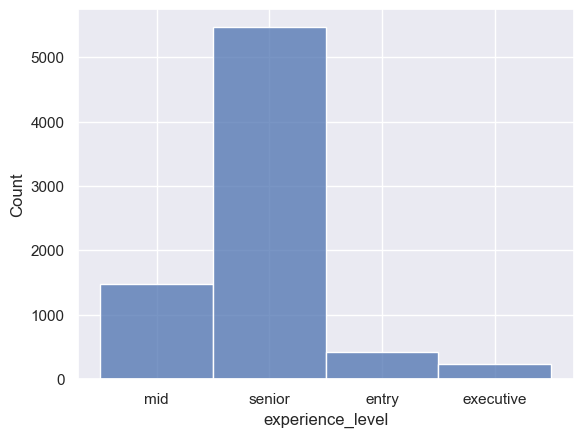

In [32]:
#  create a plot

sns.histplot(x="experience_level", data=replace_cat)

### "Employment_type"

In [23]:
# Check the unique values
categoricals["employment_type"].value_counts()

employment_type
FT    7553
CT      18
PT      13
FL      11
Name: count, dtype: int64

In [24]:
"""We know that the real meanings per each value are:
    FT - Full_time
    CT - Contract
    PT - Part_Time
    FL - Freelance
    
    We need to apply a <.replace> to replace each value with its real meaning """

replace_cat.employment_type.replace(['FT','CT' , 'PT', 'FL'], ['full_time', 'contract', 'part_Time', 'freelance'], inplace = True)

In [25]:
replace_cat['employment_type'].value_counts()

employment_type
full_time    7553
contract       18
part_Time      13
freelance      11
Name: count, dtype: int64

<Axes: xlabel='employment_type', ylabel='Count'>

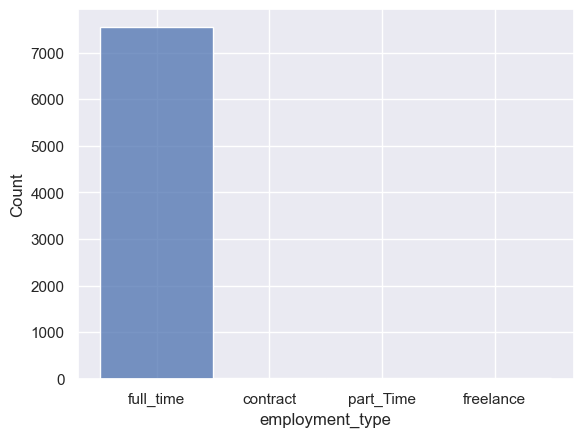

In [41]:
# plot

# Histograma

sns.histplot(x = "employment_type", data = replace_cat)

### "Remote_ratio"

In [27]:
# Check the unique values
categoricals["remote_ratio"].value_counts()

remote_ratio
0      4428
100    2952
50      215
Name: count, dtype: int64

In [28]:
"""We know that the real meanings per each value are:
    0 - No_remote/On_site
    50 - Hybrid
    100 - Remote
    
    We need to apply a <.replace> to replace each value with its real meaning """

replace_cat.remote_ratio.replace(['0','50','100'], ['on_site', 'hybrid', 'remote'], inplace = True)

In [29]:
replace_cat['remote_ratio'].value_counts()

remote_ratio
on_site    4428
remote     2952
hybrid      215
Name: count, dtype: int64

In [ ]:
 # create a plot

### "Company_size"

In [ ]:
# Check the unique values
categoricals["company_size"].value_counts()

In [ ]:
"""We know that the real meanings per each value are:
    S - small
    M - medium
    L - marge
    
    We need to apply a <.replace> to replace each value with its real meaning """

replace_cat.company_size.replace(['S','M','L'], ['small', 'medium', 'large'], inplace = True)

In [ ]:
replace_cat["company_size"].value_counts()

In [ ]:
 # create a plot

### "Salary_currency"

As mentioned above, the salary analysis will be done only with USD currency, that is why we can delete the column "salary_currency" to avoid having data that could create interferences in our analysis.


In [ ]:
# Check the unique values
categoricals["salary_currency"].value_counts()

In [ ]:
replace_cat.drop(["salary_currency"], axis=1, inplace=True)

In [ ]:
#Check if the column has been dropped correctly

replace_cat.head()

In [ ]:
 # create a plot

### "Employee_residence" & "Company_location"

In [ ]:
print("Number of unique values in employee_residence column is:\n\n", categoricals["employee_residence"].nunique())

In [ ]:
print("Number of unique values in company_locations column is:\n\n", categoricals["company_location"].nunique())

We want to replace the codes for locations or country names

Python has a function called "pycountry" (https://pypi.org/project/pycountry/) that provides the ISO databases for countries and others. We know that the <codes> in our database are encoded based on the "ISO" because it's specified in the "Legend" in the web from where we have extracted the database (https://ai-jobs.net/salaries/).

In [ ]:
"""" We want to replace the locations and countries residence codes 
for employees and companies to reduce the values size

We will need to use a For Loop to go from code to code 

""""

import pycountry

input_countries = ["employee_residence"]

employees_countries = {}
for country in pycountry.countries:
    




https://stackoverflow.com/questions/16253060/how-to-convert-country-names-to-iso-3166-1-alpha-2-values-using-python

https://snyk.io/advisor/python/pycountry/functions/pycountry.countries.get

In [ ]:
# create a plot

### "Job_title"

In [42]:
# Check the unique values
categoricals["job_title"].value_counts()

job_title
Data Engineer                    1815
Data Scientist                   1601
Data Analyst                     1148
Machine Learning Engineer         762
Applied Scientist                 212
                                 ... 
BI Data Engineer                    1
Analytics Engineering Manager       1
Data DevOps Engineer                1
AWS Data Architect                  1
Sales Data Analyst                  1
Name: count, Length: 118, dtype: int64